In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import selfies as sf
import mutations as mut
from functools import partial
import metrics as met
import functions as fn
from constants import *
from rdkit import Chem
from rdkit.Chem import Draw
import seaborn as sns
import pandas as pd

c:\Users\marti\anaconda3\envs\thesis_3.8\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from datetime import datetime



In [4]:
debug = False

## Let's optimize a molecule!

Visualizing what the molecule in question is: 

[C][C][Branch1][C][C][S][C@@H1][C@H1][Branch1][#C][N][C][=Branch1][C][=O][C][C][=C][C][=C][C][=C][Ring1][=Branch1][C][=Branch1][C][=O][N][Ring1][#C][C@H1][Ring2][Ring1][Ring1][C][=Branch1][C][=O][O][Si][Branch1][C][C][Branch1][C][C][C]


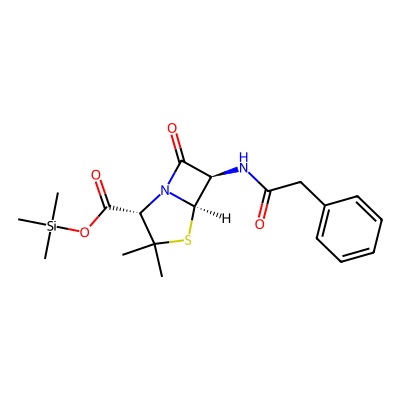

In [5]:
if debug:
    molecule = "COCOCOCOCOC"
else:
    molecule = "CC1(C)S[C@@H]2[C@H](NC(=O)CC3=CC=CC=C3)C(=O)N2[C@H]1C(=O)O[Si](C)(C)C"
m = Chem.MolFromSmiles(molecule)
im=Draw.MolToImage(m, size=(400,400))
print(sf.encoder(molecule))
display(im)

## Define what does it mean to be "optimal"
Since this is just a showcase, let the metrics be arbitrary: 
- biggest molecular weight (metric 1)
- least amount of carbon atoms (metric 2)

These metrics are linearly dependent, so posing the optimization problem like this will make it a good demonstration for multi-objective optimization.

In [6]:
#GUACAMOL_TASK_NAMES = ['med1', 'pdop', 'adip', 'rano', 'osmb', 'siga','zale', 'valt', 'med2', 'dhop', 'shop', 'fexo']
#OTHER_TASKS = ['logp','qed']

metric_function_list = [
    #partial(met.mol_mass_SMILES), #Metric 1
    #partial(met.specific_element_count_SMILES,element = 'C') #Metric 2
    partial(met.get_obj,objective="fexo"),
    partial(met.get_obj,objective="zale")

]

In [7]:
if debug:
    mutation_function_list = [
        partial(mut.replacement)
        ,partial(mut.addition,fragment_size=1)
        ,partial(mut.deletion,n=1)
        ]
else:
    mutation_function_list = [
        partial(mut.replacement),
        #partial(mut.addition,fragment_size=1),
        #partial(mut.deletion,n=1)
    ]

# Initialization   

100%|██████████| 200/200 [00:00<00:00, 579.71it/s]


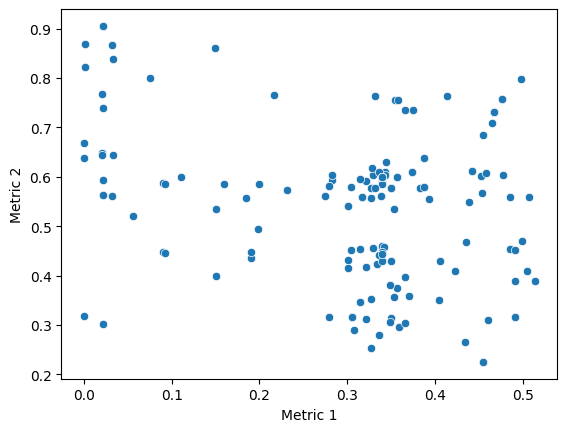

In [8]:
if debug:
    n=50
else:
    n = 200
metrics = ['Metric 1', 'Metric 2']
initial_frontier = []
initial_pop = []
min_size = 1
#initial_pop = fn.initialize_pop_batch(n,sf.encoder(molecule),metric_function_list,mutation_function_list)
while len(initial_frontier)<=min_size:
    initial_pop = fn.initialize_pop_batch(n,sf.encoder(molecule),metric_function_list,mutation_function_list)
    initial_frontier = fn.get_pareto_optimal(initial_pop,metrics,minimize=False)
    #print(len(initial_frontier))
    
#initial_frontier = fn.get_pareto_optimal(initial_pop,metrics,minimize=False)

#flip metric due to minimizing optimization
#initial_pop['Metric 2'] = initial_pop['Metric 2'].apply(met.one_over_metric)

import numpy as np
#x = np.array(initial_pop["Metric 1"])
#y = np.array(initial_pop["Metric 2"])


#sns.scatterplot(data=initial_pop, x=x, y=y)
#sns.scatterplot(data=initial_pop.astype({'Metric 1':'str', 'Metric 2':'str'}), x="Metric 1", y="Metric 2")
sns.scatterplot(data=initial_pop, x="Metric 1", y="Metric 2")
#plt.yscale('log')
#plt.xscale('log')
plt.show()

## Identify best (Pareto optimal) solutions

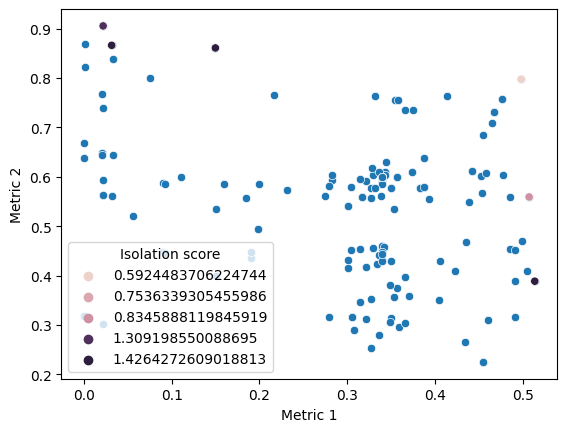

In [9]:

try:
    initial_frontier = fn.get_isolation(initial_frontier,metrics)
except:
    pass
sns.scatterplot(data=initial_pop, x="Metric 1", y="Metric 2")
sns.scatterplot(data=initial_frontier, x="Metric 1", y="Metric 2", hue="Isolation score")
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [10]:
initial_pop.sort_values('Metric 1')

,SMILES molecule,Generation,Metric 1,Metric 2,Pareto Front
40,C#B,0,0.000000e+00,0.319207,-2
139,CC(C)S[C@@H1]I,0,2.396565e-07,0.637856,-2
30,CC(C)S[C@@H1][C@H1]I,0,3.010929e-07,0.669020,-2
16,CC(C)S[C@@H1][C@H1](NC(=O)CC1=CC=CC=C1)CF,0,1.079878e-03,0.823415,-2
175,C1C(C)S[C@@H1][C@H1]1NC(=O)CC2=CC=CC=C2,0,1.081047e-03,0.869834,-2
...,...,...,...,...,...
189,CC1(C)S[C@@H1]2[C@H1](NC(=O)CC3=CC=CC=C3)C(=O)...,0,4.979457e-01,0.797763,1
106,CC(C)S1[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)C(=O)N...,0,4.993351e-01,0.470171,-2
15,CC(C)S1[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)C(=O)N...,0,5.044948e-01,0.409564,-2
127,C[N-1]C1CS[C@@H1]2[C@H1](NC(=O)CC3=CC=CC=C3)C(...,0,5.070545e-01,0.559333,1


In [11]:
current_dateTime = datetime.now()

time_format = f"{current_dateTime.date()}_{str(current_dateTime.hour).zfill(2)}-{str(current_dateTime.minute).zfill(2)}-{str(current_dateTime.second).zfill(2)}"
print(time_format)
save = False
if save:
    initial_pop.to_csv(f'PARETO_TEST_initial_pop_{time_format}')

2023-06-10_14-42-40


In [12]:
initial_frontier

,SMILES molecule,Isolation score,Generation,Metric 1,Metric 2,Pareto Front
76,CC(C1)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)C1=O,0.753634,0,0.021983,0.905605,1
108,CC(C1)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)C1=O,1.309199,0,0.021983,0.905605,1
6,CC1(C)S[C@@H1]2[C@H1](NC(=O)CC3=CC=CC=C3)C(=O)...,1.426427,0,0.031664,0.866361,1
193,CC1(C)S[C@@H1]2[C@H1](NC(=O)CC3=CC=CC=C3)C(=O)...,1.426427,0,0.149804,0.861033,1
189,CC1(C)S[C@@H1]2[C@H1](NC(=O)CC3=CC=CC=C3)C(=O)...,0.592448,0,0.497946,0.797763,1
127,C[N-1]C1CS[C@@H1]2[C@H1](NC(=O)CC3=CC=CC=C3)C(...,0.834589,0,0.507055,0.559333,1
84,CC(C)S1[C@@H1][C@H1][C-1]=CNC(=O)CC2=CC=CC=C2C...,1.426427,0,0.513468,0.388771,1


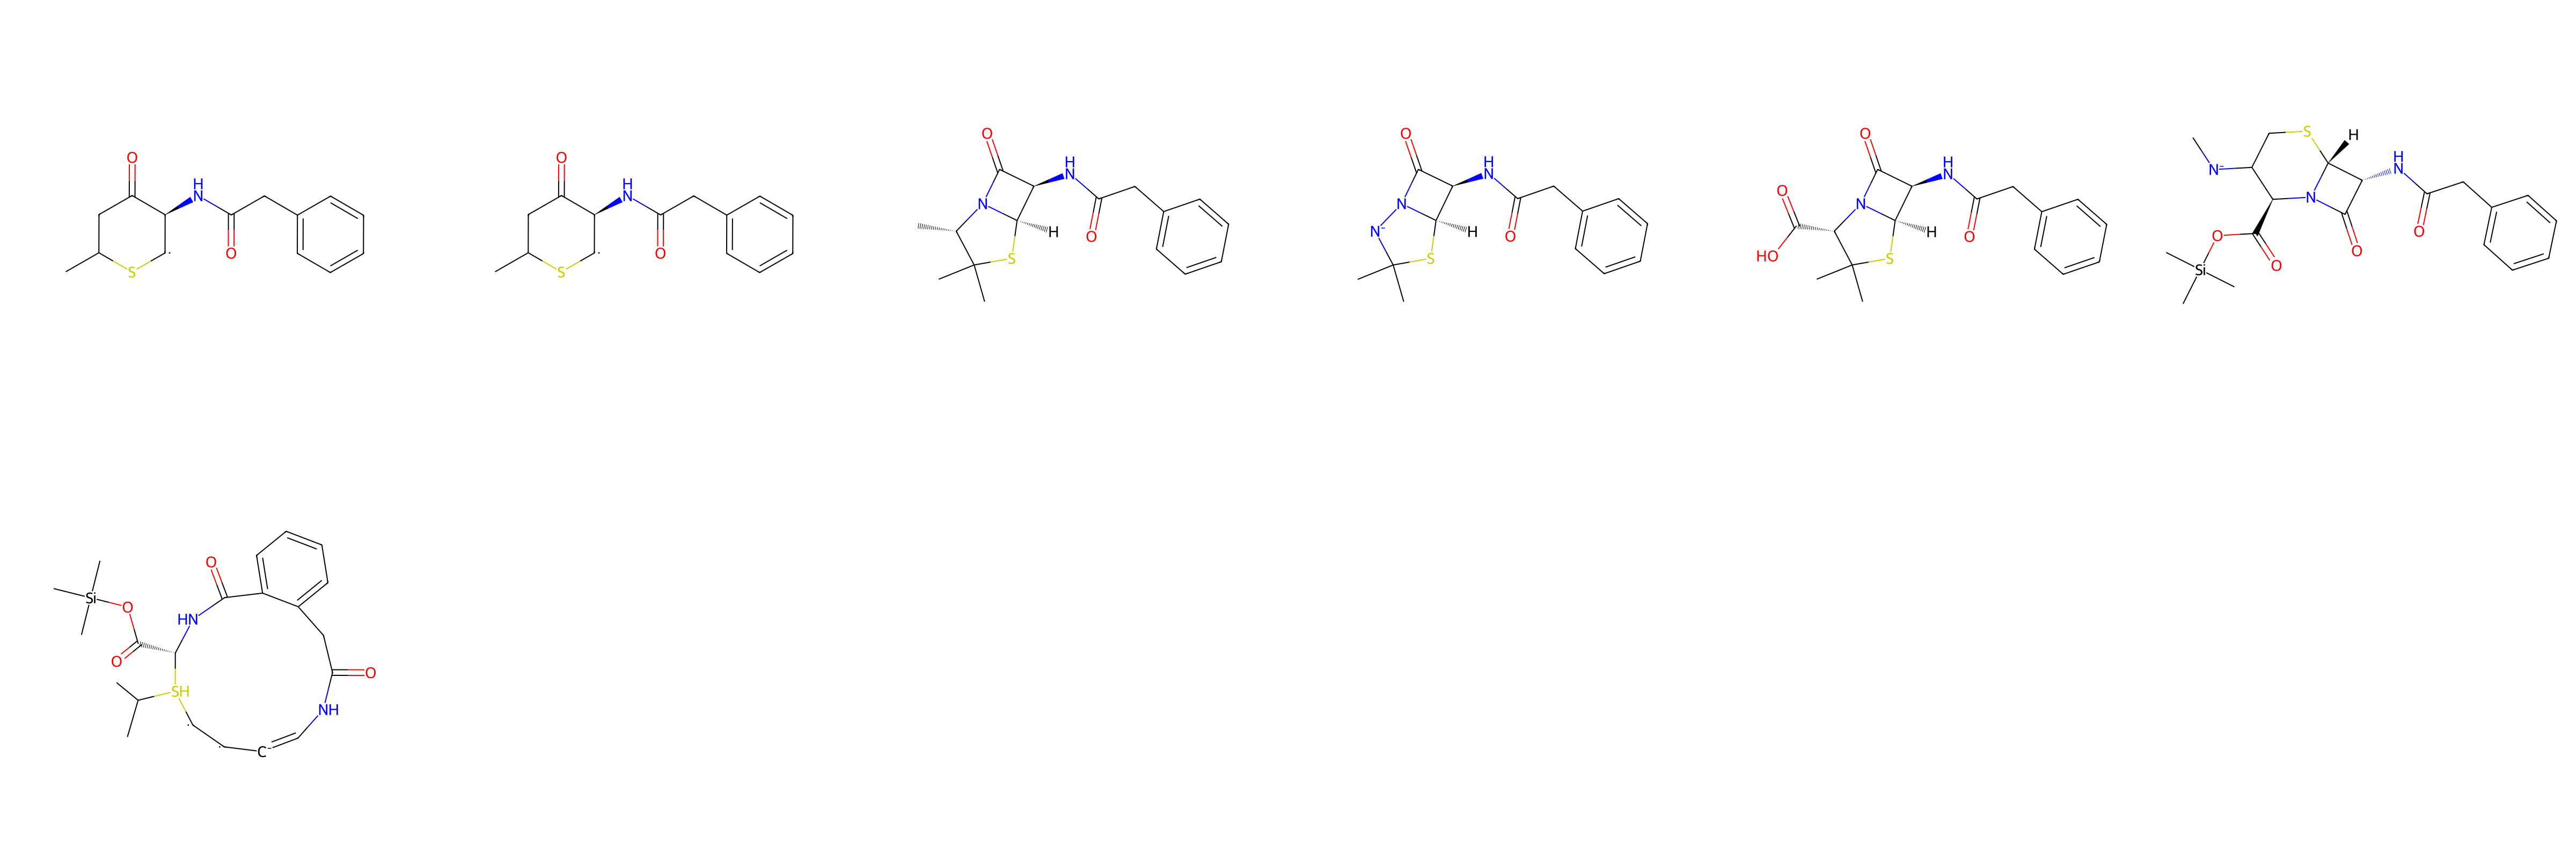

In [13]:
initial_frontier_mols = [Chem.MolFromSmiles(molecule) for molecule in initial_frontier["SMILES molecule"]]
img = Draw.MolsToGridImage(initial_frontier_mols, 
                           molsPerRow=6, 
                           subImgSize=(800, 800), 
                           maxMols=len(initial_frontier_mols),
                           legends=None)
display(img)

## Take best solutions as basis for new generations and keep optimizing


In [14]:
gen_history = pd.DataFrame(columns=initial_frontier.columns)

generations = 10

temp_frontier = initial_frontier.copy(deep=True)
for generation in (range(generations)):    
    temp_pop = fn.populate_from_df_batch(temp_frontier,n,metric_function_list,mutation_function_list,
                                   generation,include_seeds=True)
    temp_pop.reset_index(drop=True,inplace=True)
    #temp_pop['Metric 2'] = temp_pop['Metric 2'].apply(met.one_over_metric)
    temp_frontier = fn.get_isolation(fn.get_pareto_optimal(temp_pop,metrics,minimize=False),
                                    metrics=metrics)
    gen_history = pd.concat([gen_history,temp_frontier])

100%|██████████| 200/200 [00:00<00:00, 647.25it/s]


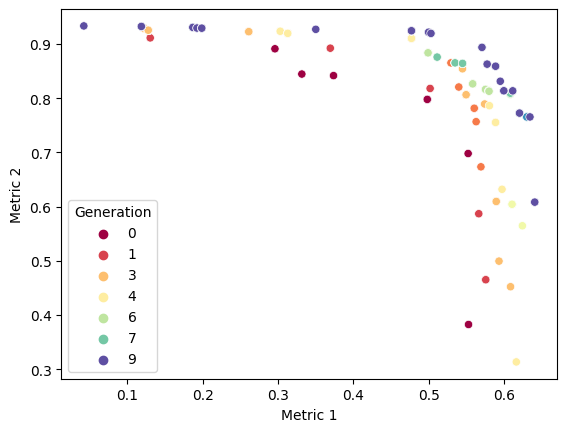

In [15]:
sns.scatterplot(data=gen_history, x="Metric 1", y="Metric 2", hue = "Generation", 
                palette=sns.color_palette("Spectral", as_cmap=True)  )

#plt.yscale('log')
#plt.xscale('log')
plt.show()

## Display latest generation

In [16]:
latest_gen = gen_history[gen_history['Generation']==gen_history['Generation'].max()]
latest_gen

,SMILES molecule,Isolation score,Generation,Metric 1,Metric 2,Pareto Front
50,C1C(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)C([N-1...,1.140127,9,0.042137,0.933250,1
2,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,1.140127,9,0.118496,0.932317,1
168,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.068292,9,0.118496,0.932317,1
167,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.000000,9,0.118496,0.932317,1
165,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.000000,9,0.118496,0.932317,1
164,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.000000,9,0.118496,0.932317,1
163,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.000000,9,0.118496,0.932317,1
162,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.000000,9,0.118496,0.932317,1
161,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.000000,9,0.118496,0.932317,1
160,CC1(C)S[C@@H1][C@H1](NC(=O)CC2=CC=CC=C2)S(=O)C...,0.000000,9,0.118496,0.932317,1


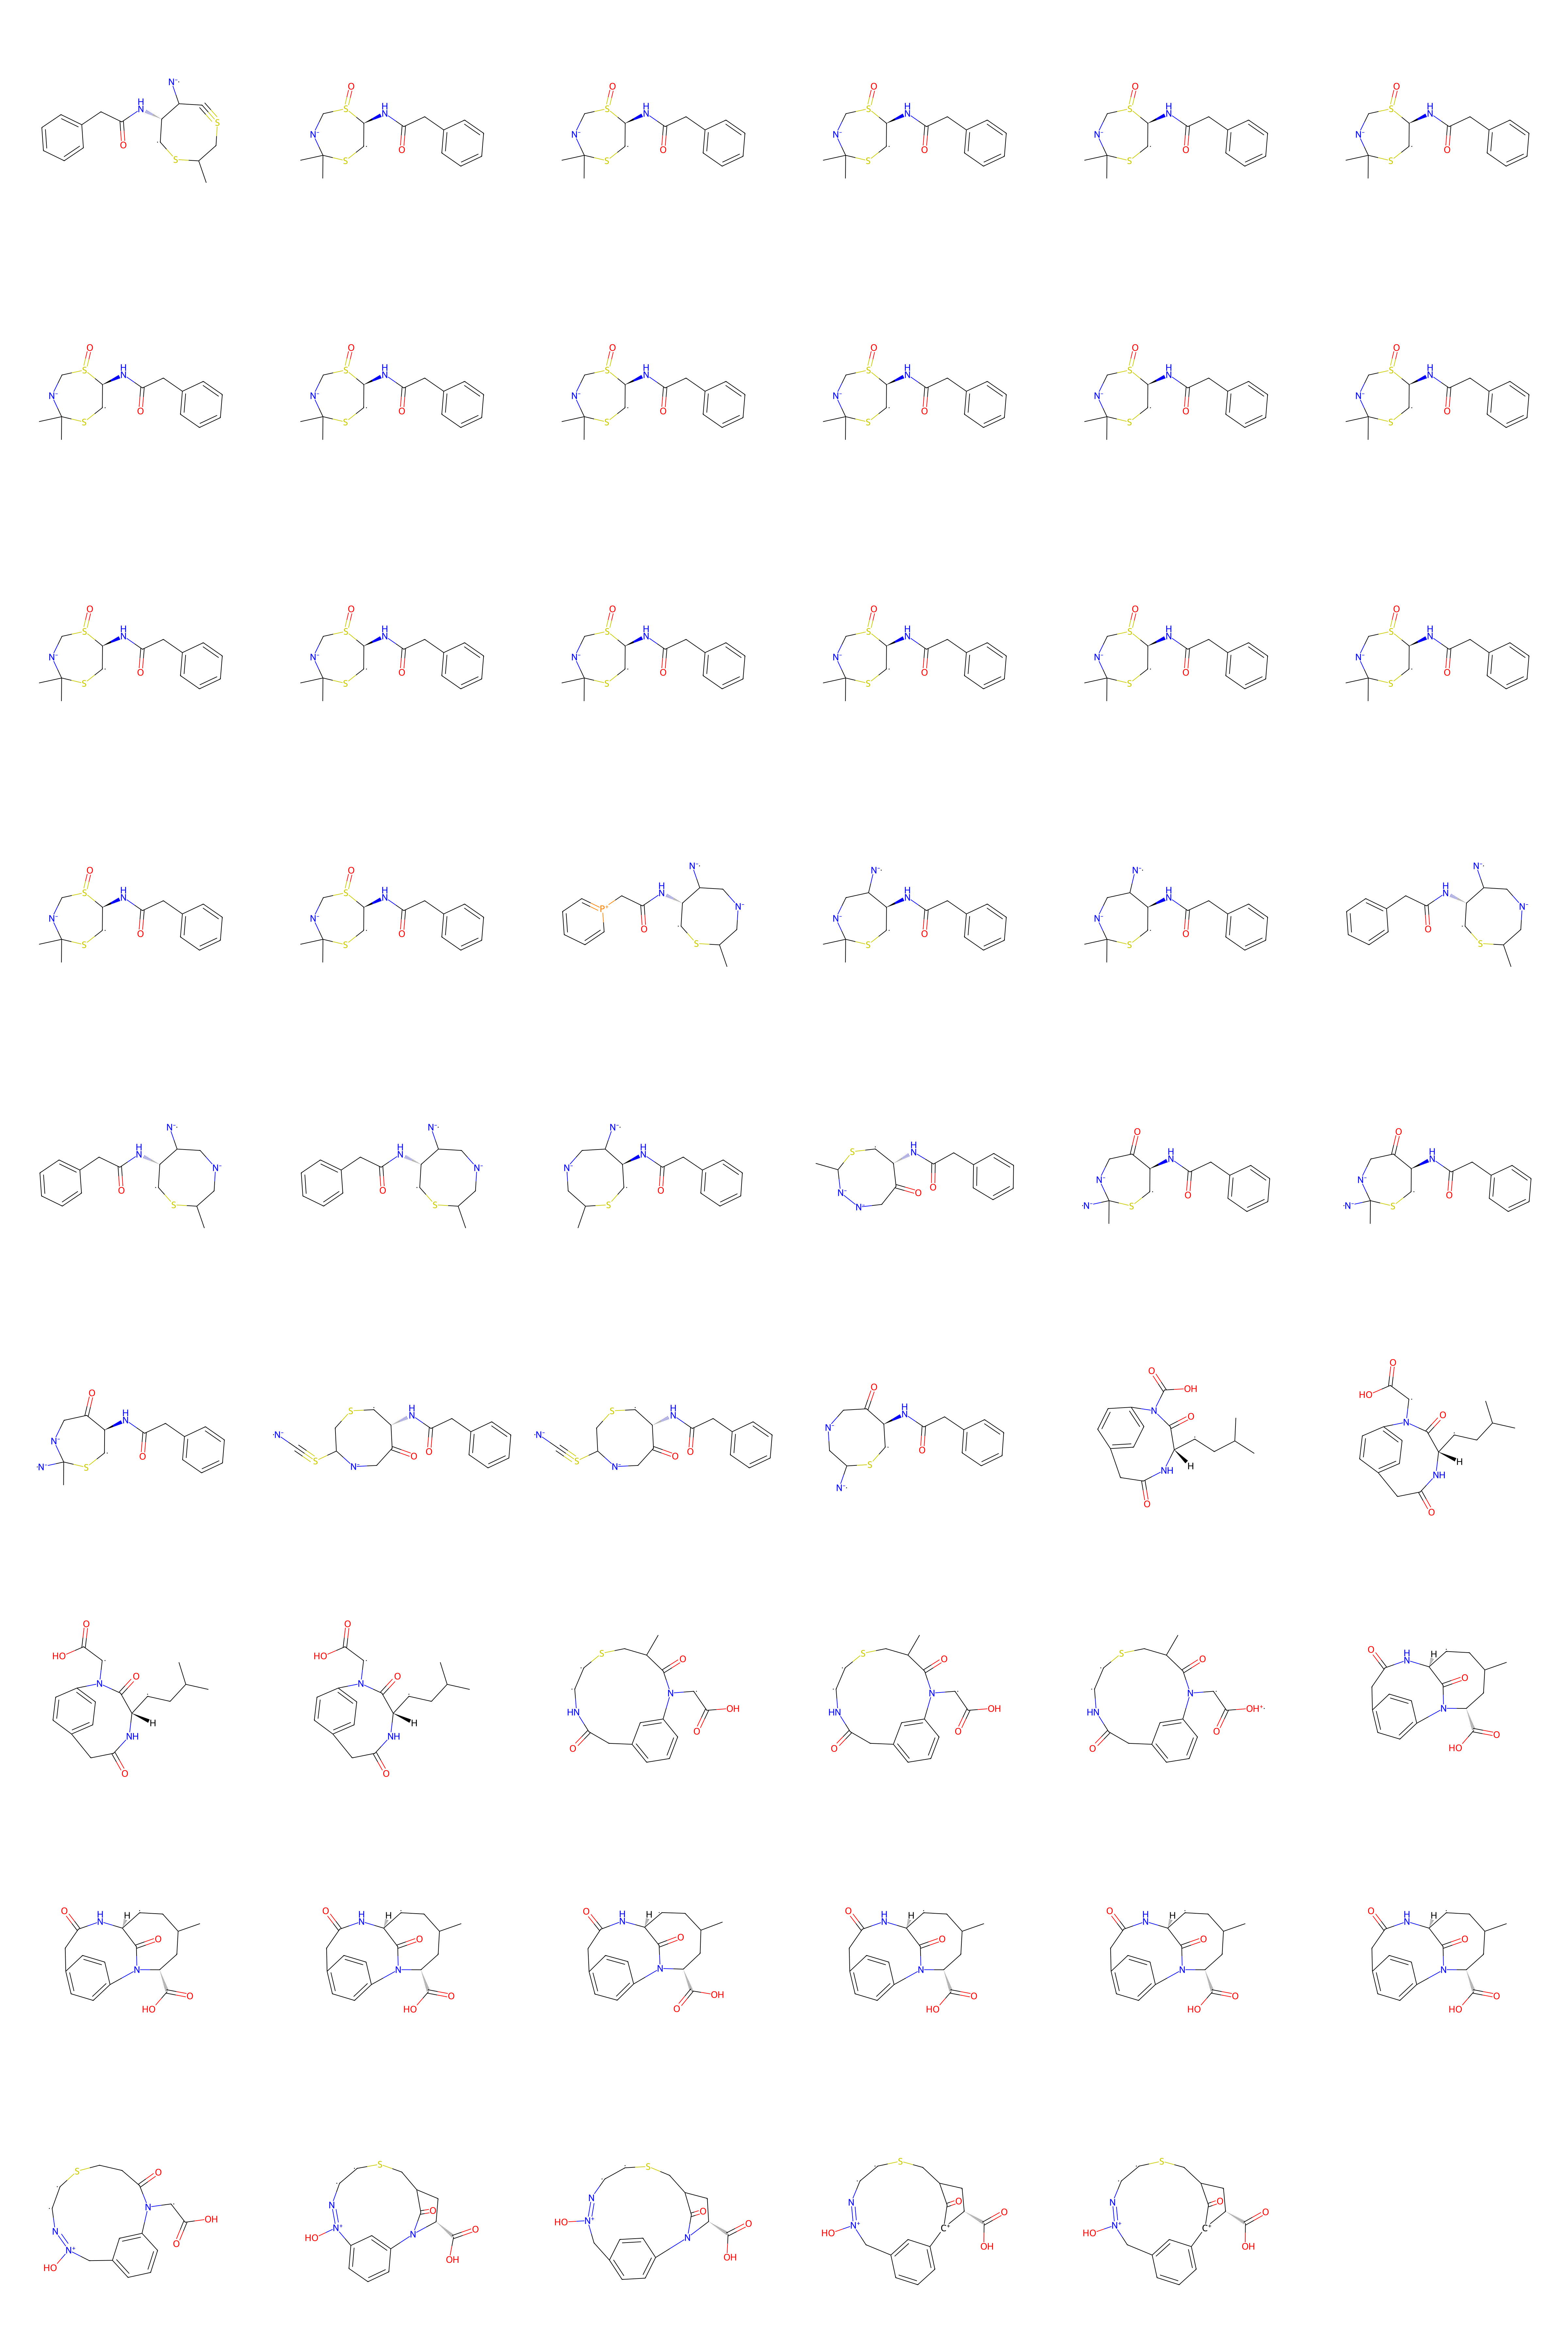

In [29]:
latest_gen_mol = [Chem.MolFromSmiles(molecule) for molecule in latest_gen["SMILES molecule"].tolist()]
img = Draw.MolsToGridImage(latest_gen_mol, 
                           molsPerRow=6, 
                           subImgSize=(800, 800), 
                           maxMols=len(latest_gen),
                           legends=None)
display(img)

In [27]:
print(type(latest_gen_mol))

<class 'list'>


# Display all generations

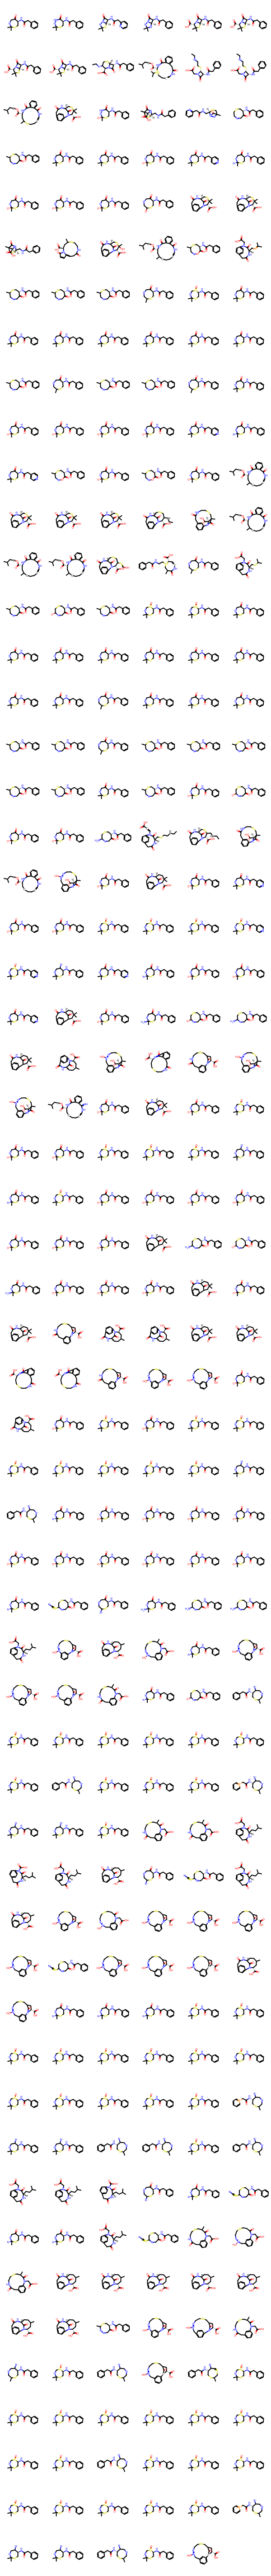

In [18]:
gen_history.sort_values('Generation', inplace=True)

all_gen_mol = [Chem.MolFromSmiles(molecule) for molecule in gen_history["SMILES molecule"]]
#latest_gen_mol = [Chem.MolFromSmiles(molecule) for molecule in latest_gen["SMILES molecule"]]
img = Draw.MolsToGridImage(all_gen_mol, 
                           molsPerRow=6, 
                           subImgSize=(100, 100), 
                           maxMols=len(gen_history),
                           legends=None)
#img = Draw.MolsToGridImage(latest_gen_mol, 
                           #molsPerRow=6, 
                           #subImgSize=(800, 800), 
                           #maxMols=len(latest_gen),
                           #legends=None)
display(img)

In [19]:
if save:
    gen_history.to_csv(f'gen_history_thesis_{time_format}')

In [20]:
import os
os.getcwd()

'c:\\Users\\marti\\Desktop\\__SKOLA_VU\\__THESIS\\repo\\lead-optimization-pipeline\\pipeline'

In [21]:
import pandas as pd
if save:
    df = pd.read_csv(f'gen_history_thesis_{time_format}')

In [22]:
df

NameError: name 'df' is not defined